In [4]:
import pandas as pd
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df["Wine"].unique()

array([1, 2, 3], dtype=int64)

In [7]:
X = df.drop("Wine",axis=1)
Y = df["Wine"]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [10]:
X_train

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985


In [11]:
from sklearn.feature_selection import mutual_info_classif as MC

In [13]:
mutual_info = MC(X_train,Y_train)
mutual_info

array([0.41157898, 0.31081808, 0.18696692, 0.24453573, 0.13401469,
       0.47182121, 0.71752296, 0.11960454, 0.26072313, 0.61533734,
       0.53506426, 0.55248168, 0.53535986])

In [14]:
mutual_info = pd.Series(mutual_info)

In [17]:
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.717523
Color.int               0.615337
OD                      0.552482
Proline                 0.535360
Hue                     0.535064
Phenols                 0.471821
Alcohol                 0.411579
Malic.acid              0.310818
Proanth                 0.260723
Acl                     0.244536
Ash                     0.186967
Mg                      0.134015
Nonflavanoid.phenols    0.119605
dtype: float64

<AxesSubplot:>

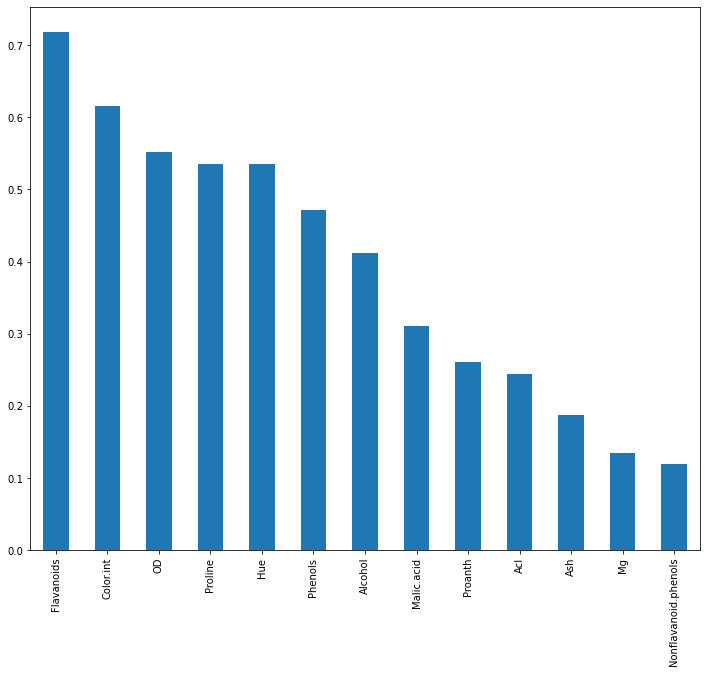

In [20]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12,10))

In [21]:
#for slect top columns we need used here SelectK best
from sklearn.feature_selection import SelectKBest

In [41]:
mutual_class = SelectKBest(MC,k=7)
mutual_class.fit(X_train,Y_train)
X_train = [column for column in X_train.columns if column in X_train.columns[mutual_class.get_support()]]

In [42]:
X_train

['Alcohol', 'Phenols', 'Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline']